# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# EDA and Data Preprocessing

In [2]:
dataset=pd.read_csv('mail_data.csv')
dataset.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Category
ham     4825
spam     747
Name: count, dtype: int64


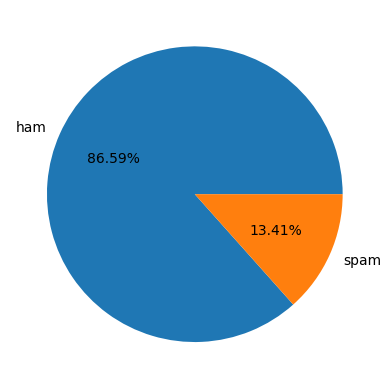

In [3]:
plt.pie(dataset['Category'].value_counts(),labels=["ham","spam"],autopct='%0.2f%%')
print(dataset['Category'].value_counts())

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
dataset.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
dataset.duplicated("Message").sum()

415

In [7]:
dataset.drop_duplicates(subset="Message",keep="first",inplace=True)

In [8]:
dataset.duplicated("Message").sum()

0

Category
ham     4516
spam     641
Name: count, dtype: int64


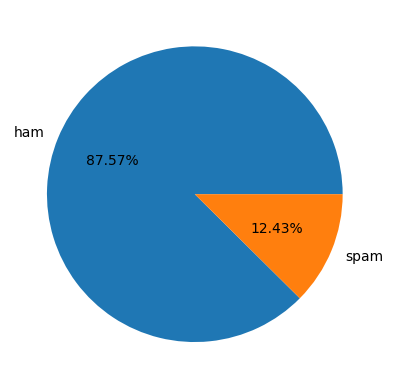

In [9]:
plt.pie(dataset['Category'].value_counts(),labels=["ham","spam"],autopct='%0.2f%%')
print(dataset['Category'].value_counts())

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
dataset['Category']=le.fit_transform(dataset['Category'])

In [12]:
print(le.classes_)
print(le.transform(le.classes_))

['ham' 'spam']
[0 1]


In [13]:
dataset.sample(5)

,Category,Message
2942,0,My supervisor find 4 me one lor i thk his stud...
5474,0,Where's mummy's boy ? Is he being good or bad ...
4043,0,What time do u get out?
1720,0,Then u better go sleep.. Dun disturb u liao.. ...
3034,0,"Aight, lemme know what's up"


In [14]:
dataset.shape

(5157, 2)

In [15]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /home/tonmoy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
corpus=[]
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
for i in dataset['Message']:
  msg = re.sub('[^a-zA-Z]', ' ', i)
  msg = msg.lower()
  msg = msg.split()
  msg = [ps.stem(word) for word in msg if not word in set(all_stopwords)]
  msg = ' '.join(msg)
  corpus.append(msg)

# type(dataset["Message"][2])
# len(dataset['Message'])

In [17]:
# corpus

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus, dataset['Category'], test_size = 0.20, random_state = 0)

In [19]:
len(X_train)

4125

In [20]:
len(X_test)

1032

In [21]:
len(y_train)

4125

In [22]:
len(y_test)

1032

# Vectorize the message

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
# cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv=cv.transform(X_test).toarray()

In [24]:
len(X_train_cv[0])
# X_test_cv

5000

In [25]:
len(X_test_cv[0])
# X_test_cv[0]

5000

In [26]:
cv.vocabulary_

{'old': 2822,
 'orchard': 2839,
 'near': 2660,
 'univ': 4522,
 'thank': 4240,
 'rington': 3437,
 'order': 2840,
 'refer': 3349,
 'number': 2782,
 'mobil': 2515,
 'charg': 775,
 'tone': 4362,
 'arriv': 268,
 'pleas': 3027,
 'call': 680,
 'custom': 1081,
 'servic': 3628,
 'colour': 919,
 'red': 3344,
 'text': 4227,
 'txtstar': 4472,
 'place': 3013,
 'talk': 4157,
 'explain': 1553,
 'ok': 2817,
 'mom': 2531,
 'instead': 2072,
 'fun': 1794,
 'webpag': 4718,
 'avail': 326,
 'noe': 2734,
 'busi': 659,
 'realli': 3322,
 'bore': 553,
 'msg': 2579,
 'oso': 2846,
 'dunno': 1360,
 'wat': 4696,
 'choos': 836,
 'one': 2825,
 'da': 1092,
 'run': 3486,
 'activ': 50,
 'full': 1791,
 'version': 4609,
 'knacker': 2160,
 'came': 692,
 'home': 1986,
 'went': 4745,
 'sleep': 3772,
 'good': 1883,
 'time': 4312,
 'work': 4847,
 'want': 4684,
 'kiss': 2159,
 'feel': 1616,
 'next': 2703,
 'slice': 3777,
 'breadstick': 584,
 'lol': 2242,
 'regret': 3362,
 'inform': 2063,
 'nh': 2704,
 'made': 2324,
 'mistak': 2

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features = 5000)
# tf = TfidfVectorizer()
X_train_tf = tf.fit_transform(X_train).toarray()
X_test_tf=tf.transform(X_test).toarray()

In [28]:
len(X_train_cv[0])

5000

In [29]:
len(X_test_tf[0])

5000

In [30]:
tf.vocabulary_

{'old': 2822,
 'orchard': 2839,
 'near': 2660,
 'univ': 4522,
 'thank': 4240,
 'rington': 3437,
 'order': 2840,
 'refer': 3349,
 'number': 2782,
 'mobil': 2515,
 'charg': 775,
 'tone': 4362,
 'arriv': 268,
 'pleas': 3027,
 'call': 680,
 'custom': 1081,
 'servic': 3628,
 'colour': 919,
 'red': 3344,
 'text': 4227,
 'txtstar': 4472,
 'place': 3013,
 'talk': 4157,
 'explain': 1553,
 'ok': 2817,
 'mom': 2531,
 'instead': 2072,
 'fun': 1794,
 'webpag': 4718,
 'avail': 326,
 'noe': 2734,
 'busi': 659,
 'realli': 3322,
 'bore': 553,
 'msg': 2579,
 'oso': 2846,
 'dunno': 1360,
 'wat': 4696,
 'choos': 836,
 'one': 2825,
 'da': 1092,
 'run': 3486,
 'activ': 50,
 'full': 1791,
 'version': 4609,
 'knacker': 2160,
 'came': 692,
 'home': 1986,
 'went': 4745,
 'sleep': 3772,
 'good': 1883,
 'time': 4312,
 'work': 4847,
 'want': 4684,
 'kiss': 2159,
 'feel': 1616,
 'next': 2703,
 'slice': 3777,
 'breadstick': 584,
 'lol': 2242,
 'regret': 3362,
 'inform': 2063,
 'nh': 2704,
 'made': 2324,
 'mistak': 2

# Model Selection

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [32]:
lr=LogisticRegression()
nb=GaussianNB()
svc=SVC(kernel='rbf')
knn=KNeighborsClassifier()
rf=RandomForestClassifier()

models=[lr,nb,svc,knn,rf]
performance=[]

In [33]:
# accuracy_list=[]
# std_list=[]
# for m in models:
#     accuracy=cross_val_score(estimator=m, X = X_train_cv, y = y_train, cv = 10)
#     accuracy_list.append(accuracy.mean())
#     std_list.append(accuracy.std())

# performance.append(accuracy_list)
# performance.append(std_list)

In [34]:
# accuracy_list=[]
# std_list=[]
# for m in models:
#     accuracy=cross_val_score(estimator=m, X = X_train_tf, y = y_train, cv = 10)
#     accuracy_list.append(accuracy.mean())
#     std_list.append(accuracy.std())

# performance.append(accuracy_list)
# performance.append(std_list)

In [35]:
# accuracy_dataframe=pd.DataFrame(performance,columns=["LogisticRegression","Naive Bayes","SVC","KNN","Random Forest"],index=["Accuracy_cv","Std_cv","Accuracy_tf","Std_tf"])

# Trainging a model

In [40]:
# from sklearn.linear_model import LogisticRegression
# lr=LogisticRegression()
model=rf
model.fit(X_train_cv,y_train)


LogisticRegression()

In [41]:
y_pred=model.predict(X_test_cv)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix",confusion_matrix(y_test,y_pred))
print("Accuracy Score",accuracy_score(y_test,y_pred))

Confusion Matrix [[893   4]
 [ 20 115]]
Accuracy Score 0.9767441860465116
